### **Introduction to Classical Computing and Boolean Algebra**

Classical computing is built on the concept of bits, which can take values 0 or 1, and operations on these bits are defined by Boolean algebra. Boolean algebra, introduced by George Boole, uses logical operations like AND, OR, and NOT to manipulate truth values, and every classical circuit or digital computer is ultimately reducible to these operations. Logic gates are the physical realizations of Boolean operations, and combining them allows us to build more complex circuits such as adders, multiplexers, or memory elements. Understanding classical computing at this level is essential, since quantum computing builds on the same logical foundations but extends them using quantum states and unitary gates.


In [1]:
# Basic representation of bits and truth values
bits = [0, 1]
print("Bits:", bits)

# Define Boolean functions in Python
def NOT(x): return 1 - x
def AND(x, y): return x & y
def OR(x, y): return x | y
def XOR(x, y): return x ^ y

print("NOT(0) =", NOT(0))
print("NOT(1) =", NOT(1))
print("AND(1,0) =", AND(1,0))
print("XOR(1,0) =", XOR(1,0))

Bits: [0, 1]
NOT(0) = 1
NOT(1) = 0
AND(1,0) = 0
XOR(1,0) = 1


### **Truth Tables**

A truth table lists all possible inputs to a logical function and the corresponding output. This is the most direct way to understand how a gate behaves. For example, the AND gate outputs 1 only if both inputs are 1, while XOR outputs 1 if the inputs differ. Let’s generate truth tables programmatically.


In [2]:
# Generate truth tables for basic gates
def truth_table(gate_func, name):
    print(f"\nTruth Table for {name}")
    print("x y | output")
    for x in bits:
        for y in bits:
            print(f"{x} {y} | {gate_func(x,y)}")

truth_table(AND, "AND")
truth_table(OR, "OR")
truth_table(XOR, "XOR")



Truth Table for AND
x y | output
0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1

Truth Table for OR
x y | output
0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1

Truth Table for XOR
x y | output
0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


### **Classical Circuits: Half Adder**

One of the simplest classical circuits is the **half adder**, which adds two bits. It produces two outputs: the sum (using XOR) and the carry (using AND). This small circuit is the building block for binary addition in classical processors. We can simulate a half adder with Python functions and truth tables.


In [3]:
def half_adder(x, y):
    sum_bit = XOR(x, y)
    carry_bit = AND(x, y)
    return sum_bit, carry_bit

print("Half Adder Truth Table (x, y → sum, carry):")
for x in bits:
    for y in bits:
        print(f"{x}, {y} → {half_adder(x,y)}")


Half Adder Truth Table (x, y → sum, carry):
0, 0 → (0, 0)
0, 1 → (1, 0)
1, 0 → (1, 0)
1, 1 → (0, 1)


### **Advanced: Full Adder and Circuit Simulation**

A **full adder** extends the half adder by including a carry-in bit, enabling chained addition of multiple bits. It can be built from two half adders plus an OR gate. We will also visualize results using NumPy arrays to demonstrate how classical circuits scale with multiple inputs. These ideas mirror how classical processors implement arithmetic logic units.


In [4]:
def full_adder(x, y, c_in):
    sum1, carry1 = half_adder(x, y)
    sum2, carry2 = half_adder(sum1, c_in)
    c_out = OR(carry1, carry2)
    return sum2, c_out

print("Full Adder Truth Table (x, y, c_in → sum, c_out):")
for x in bits:
    for y in bits:
        for c_in in bits:
            print(f"{x}, {y}, {c_in} → {full_adder(x,y,c_in)}")


Full Adder Truth Table (x, y, c_in → sum, c_out):
0, 0, 0 → (0, 0)
0, 0, 1 → (1, 0)
0, 1, 0 → (1, 0)
0, 1, 1 → (0, 1)
1, 0, 0 → (1, 0)
1, 0, 1 → (0, 1)
1, 1, 0 → (0, 1)
1, 1, 1 → (1, 1)


### **Visualizing Truth Tables**

We can visualize truth tables as binary grids. This helps to see how logical functions act on inputs systematically. For larger circuits, these visualizations make it easier to debug and understand structure.


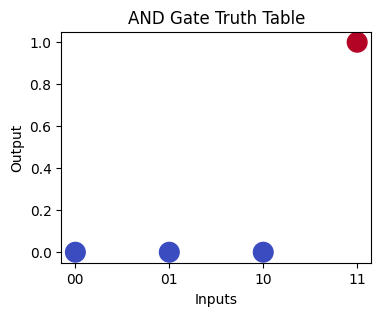

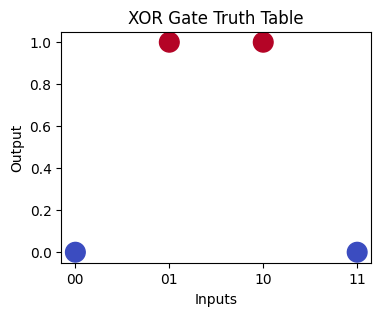

In [6]:
import itertools
from matplotlib import pyplot as plt

def visualize_gate(gate_func, name):
    inputs = list(itertools.product(bits, repeat=2))
    outputs = [gate_func(x,y) for x,y in inputs]
    
    plt.figure(figsize=(4,3))
    plt.scatter([f"{x}{y}" for x,y in inputs], outputs, s=200, c=outputs, cmap="coolwarm")
    plt.title(f"{name} Gate Truth Table")
    plt.xlabel("Inputs")
    plt.ylabel("Output")
    plt.show()

visualize_gate(AND, "AND")
visualize_gate(XOR, "XOR")


### **Key Takeaways**

Classical computing relies on bits and Boolean algebra, where logical gates like AND, OR, and NOT form the foundation of every digital circuit. By combining gates, we can build more complex circuits such as adders, which are essential for arithmetic operations in computers. Understanding these classical ideas not only explains how modern computers work at the hardware level but also provides a foundation for quantum computing, where the classical gates are replaced by quantum gates that operate on qubits in superposition.
